In [1]:
import pandas as pd
df = pd.read_csv('/content/googleplaystore_user_reviews.csv')
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re

In [3]:
# Basic statistics about the dataset
print(df.describe())
print(df.info())

       Sentiment_Polarity  Sentiment_Subjectivity
count        37432.000000            37432.000000
mean             0.182146                0.492704
std              0.351301                0.259949
min             -1.000000                0.000000
25%              0.000000                0.357143
50%              0.150000                0.514286
75%              0.400000                0.650000
max              1.000000                1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB
None


In [4]:
# Handling missing values
df = df.dropna()

In [5]:
# Exploratory Data Analysis (EDA)
# Sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)

Sentiment
Positive    23998
Negative     8271
Neutral      5158
Name: count, dtype: int64


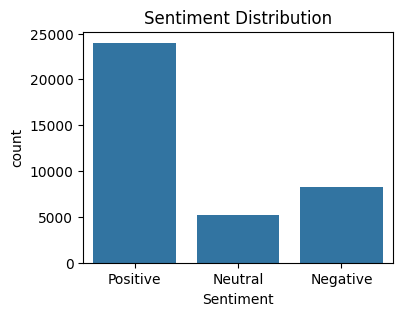

In [16]:
# Visualize sentiment distribution
plt.figure(figsize=(4, 3))
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

In [7]:
# Sentiment Polarity and Subjectivity distribution
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

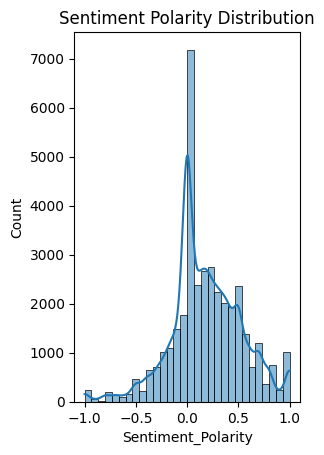

In [8]:
plt.subplot(1, 2, 1)
sns.histplot(df['Sentiment_Polarity'], bins=30, kde=True)
plt.title('Sentiment Polarity Distribution')

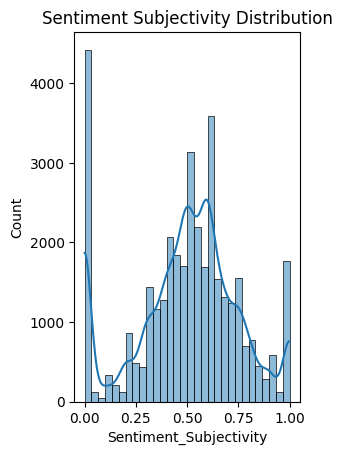

In [9]:
plt.subplot(1, 2, 2)
sns.histplot(df['Sentiment_Subjectivity'], bins=30, kde=True)
plt.title('Sentiment Subjectivity Distribution')
plt.show()

In [15]:
# Text Cleaning for WordCloud
def clean_text(text):
    text = re.sub(r'\W+', ' ', text)
    text = text.lower()
    return text
df['cleaned_review'] = df['Translated_Review'].apply(clean_text)

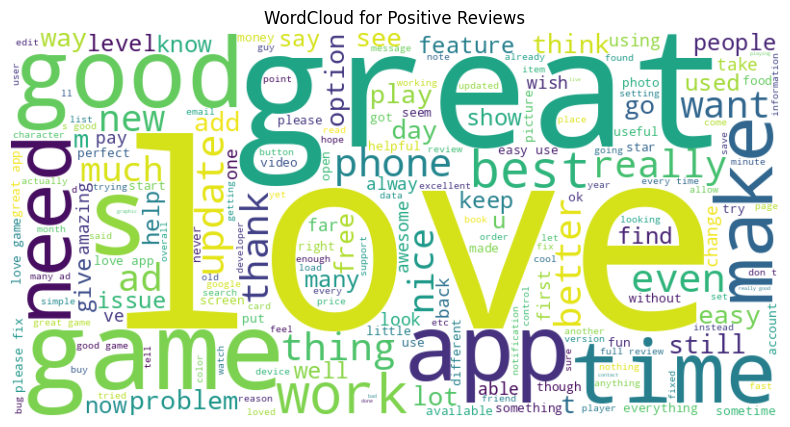

In [11]:
# WordCloud for positive reviews
positive_reviews = ' '.join(df[df['Sentiment'] == 'Positive']['cleaned_review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Positive Reviews')
plt.show()

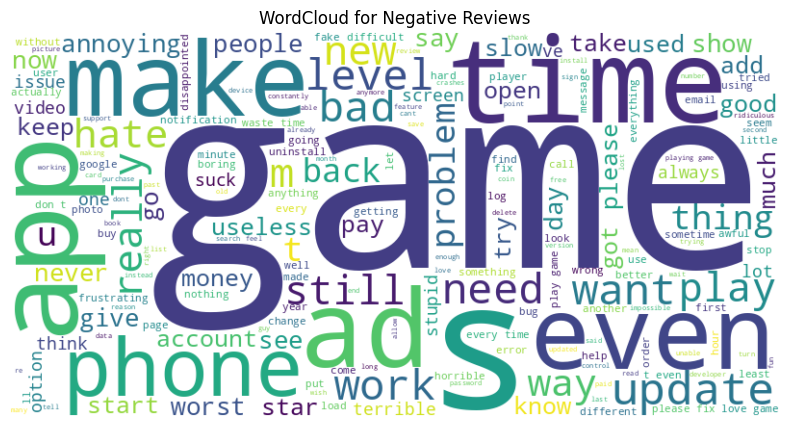

In [12]:
# WordCloud for negative reviews
negative_reviews = ' '.join(df[df['Sentiment'] == 'Negative']['cleaned_review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Negative Reviews')
plt.show()

In [13]:
# Common words in reviews
all_reviews = ' '.join(df['cleaned_review'])
word_counts = Counter(all_reviews.split())
common_words = word_counts.most_common(10)
print("Most common words:", common_words)

Most common words: [('i', 39013), ('it', 11852), ('game', 9397), ('the', 6592), ('s', 5596), ('like', 5505), ('good', 5283), ('this', 5093), ('app', 5024), ('great', 4817)]


In [14]:
# Average polarity and subjectivity for each sentiment
avg_polarity = df.groupby('Sentiment')['Sentiment_Polarity'].mean()
avg_subjectivity = df.groupby('Sentiment')['Sentiment_Subjectivity'].mean()
print("Average Polarity by Sentiment:", avg_polarity)
print("Average Subjectivity by Sentiment:", avg_subjectivity)

Average Polarity by Sentiment: Sentiment
Negative   -0.256173
Neutral     0.000000
Positive    0.372402
Name: Sentiment_Polarity, dtype: float64
Average Subjectivity by Sentiment: Sentiment
Negative    0.535087
Neutral     0.079786
Positive    0.566949
Name: Sentiment_Subjectivity, dtype: float64
